# Tutorial 2
## Name: Soham Sahasrabuddhe
## Roll Number: 23B1848

In [1]:
#Basic imports
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.model_selection import train_test_split

# Question 1

In [37]:
x_min = float(input("Enter minimum"))
x_max = float(input("Enter maximum"))

N = int(input("Enter total bins"))

m = float(input("Value of m"))
c = float(input("Value of c"))
a1 = float(input("Value of a1"))
a2 = float(input("Value of a2"))

h = (x_max - x_min)/N  # Step Size

x_val = np.zeros(N+1)
y_val = np.zeros(N+1)

x = x_min
for i in range(N + 1):
    x_val[i] = x
    rnd1 = np.random.uniform(-0.5, 0.5)
    rnd2 = np.random.uniform(-0.5, 0.5)
    y_val[i] = (m + a1 * rnd1) * x + c + a2 * rnd2
    x += h

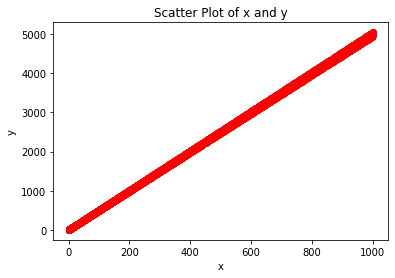

In [38]:
# The Plot
plt.scatter(x_val, y_val, c = 'r')
plt.title('Scatter Plot of x and y')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

### Using Linear Regression

In [39]:
train_x, test_x, train_y, test_y = train_test_split(x_val, y_val, test_size=0.3, random_state=37)

beta_1 = ((np.mean(train_x))*(np.mean(train_y)) - np.mean(train_x*train_y))/(np.mean(train_x)**2 - np.mean(train_x**2))
beta_0 = (np.mean(train_y) - beta_1*np.mean(train_x))

best_y = beta_0 + beta_1 * test_x

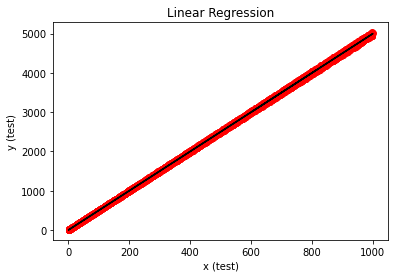

In [40]:
plt.scatter(test_x, test_y, c = 'r')
plt.plot(test_x,best_y,c = 'black')
plt.title('Linear Regression')
plt.xlabel('x (test)')
plt.ylabel('y (test)')
plt.show()

In [41]:
mse_test = np.mean((test_y - best_y)**2)
print(mse_test)

284.6693478350456


### Using Ridge and Lasso Regression

In [43]:
index = np.arange(N+1)
np.random.shuffle(index)  # Creating test and training data randomly

train_split = int(0.7*(N+1))
val_split = int(0.15 * (N + 1))

train_x = x_val[index[:train_split]].reshape(-1,1) # Gives error if not reshaped
train_y = y_val[index[:train_split]]

val_x = x_val[index[train_split:train_split + val_split]].reshape(-1,1)
val_y = y_val[index[train_split:train_split + val_split]]

test_x = x_val[index[train_split + val_split:]].reshape(-1,1)
test_y = y_val[index[train_split + val_split:]]

lambdas = [0.01, 0.1, 1, 10, 100]  # Hyperparameter values to test
results = {}

for lamb in lambdas:
    # Ridge Regression
    ridge = Ridge(alpha=lamb)
    ridge.fit(train_x, train_y)
    y_pred_ridge = ridge.predict(val_x)
    mse_ridge = np.mean((val_y - y_pred_ridge)**2)
    results[f'Ridge (λ={lamb})'] = mse_ridge

    # Lasso Regression
    lasso = Lasso(alpha=lamb)
    lasso.fit(train_x, train_y)
    y_pred_lasso = lasso.predict(val_x)
    mse_lasso = np.mean((val_y-y_pred_lasso)**2)
    results[f'Lasso (λ={lamb})'] = mse_lasso

# Print results
for model, mse in results.items():
    print(f'MSE for {model}: {mse}')

MSE for Ridge (λ=0.01): 285.6556472658938
MSE for Lasso (λ=0.01): 285.6556350286247
MSE for Ridge (λ=0.1): 285.6556471871626
MSE for Lasso (λ=0.1): 285.6555249223356
MSE for Ridge (λ=1): 285.6556463998629
MSE for Lasso (λ=1): 285.6544345370524
MSE for Ridge (λ=10): 285.65563852741
MSE for Lasso (λ=10): 285.64459844527977
MSE for Ridge (λ=100): 285.6555598573674
MSE for Lasso (λ=100): 285.6530136334133


# Question 2

In [44]:
from ucimlrepo import fetch_ucirepo 
  
energy_efficiency = fetch_ucirepo(id=242) 
  
# data 
X = np.array(energy_efficiency.data.features)
Y = np.array(energy_efficiency.data.targets)
  
# metadata 
print(energy_efficiency.metadata) 
  
# variable information 
print(energy_efficiency.variables) 

{'uci_id': 242, 'name': 'Energy Efficiency', 'repository_url': 'https://archive.ics.uci.edu/dataset/242/energy+efficiency', 'data_url': 'https://archive.ics.uci.edu/static/public/242/data.csv', 'abstract': 'This study looked into assessing the heating load and cooling load requirements of buildings (that is, energy efficiency) as a function of building parameters.', 'area': 'Computer Science', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Multivariate'], 'num_instances': 768, 'num_features': 8, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': ['Y1', 'Y2'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2012, 'last_updated': 'Mon Feb 26 2024', 'dataset_doi': '10.24432/C51307', 'creators': ['Athanasios Tsanas', 'Angeliki Xifara'], 'intro_paper': {'ID': 379, 'type': 'NATIVE', 'title': 'Accurate quantitative estimation of energy performance of residential buildings using statistical machine 

## Part (a)

In [45]:
train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size=0.3, random_state=42)

regr1, regr2 = LinearRegression(), LinearRegression()

regr1.fit(train_x, train_y[:,0])
regr2.fit(train_x, train_y[:,1])

y1 = regr1.predict(test_x)
y2 = regr2.predict(test_x)

mse1 = np.mean((y1 - test_y[:,0]) ** 2)
mse2 = np.mean((y2 - test_y[:,1]) ** 2)

print(f'Mean Squared Error for Output Y1 = {mse1}')
print(f'Mean Squared Error for Output Y2 = {mse2}')

Mean Squared Error for Output Y1 = 8.83726815309656
Mean Squared Error for Output Y2 = 10.320583891778828


## Part (b)

In [46]:
N= len(X)
index = np.arange(N)
np.random.shuffle(index)  # Shuffle dataset

train_split = int(0.7 * N)
val_split = int(0.15 * N)

train_x = X[index[:train_split]]
train_y = Y[index[:train_split]]

val_x = X[index[train_split:train_split + val_split]]
val_y = Y[index[train_split:train_split + val_split]]

test_x = X[index[train_split + val_split:]]
test_y = Y[index[train_split + val_split:]]

lambdas = [0.01, 0.1, 1, 10, 100]  # Hyperparameter values to test
results = {0: {}, 1: {}}  # For Y1 and Y2

# Loop through each output
for i in range(len(Y[0,:])):
    for lamb in lambdas:
        # Ridge Regression
        ridge = Ridge(alpha=lamb)
        ridge.fit(train_x, train_y[:, i])  # Fit for the i-th output
        y_pred_ridge = ridge.predict(val_x)
        mse_ridge = np.mean((val_y[:, i] - y_pred_ridge)**2)
        results[i][f'Ridge (λ={lamb})'] = mse_ridge

        # Lasso Regression
        lasso = Lasso(alpha=lamb)
        lasso.fit(train_x, train_y[:, i])  # Fit for the i-th output
        y_pred_lasso = lasso.predict(val_x)
        mse_lasso = np.mean((val_y[:, i] - y_pred_lasso)**2)
        results[i][f'Lasso (λ={lamb})'] = mse_lasso

# Print results
for output_index, mse_results in results.items():
    print(f'Output Y{output_index + 1}:')
    for model, mse in mse_results.items():
        print(f'  MSE for {model}: {mse}')


Output Y1:
  MSE for Ridge (λ=0.01): 9.621686966022887
  MSE for Lasso (λ=0.01): 10.082347059301389
  MSE for Ridge (λ=0.1): 9.826363840308849
  MSE for Lasso (λ=0.1): 10.339643399347304
  MSE for Ridge (λ=1): 10.020483897731589
  MSE for Lasso (λ=1): 21.280361005788375
  MSE for Ridge (λ=10): 11.531618612885495
  MSE for Lasso (λ=10): 22.43881800997475
  MSE for Ridge (λ=100): 16.668748925743323
  MSE for Lasso (λ=100): 32.18285121428088
Output Y2:
  MSE for Ridge (λ=0.01): 10.281182033248836
  MSE for Lasso (λ=0.01): 10.682696989175366
  MSE for Ridge (λ=0.1): 10.44126165463894
  MSE for Lasso (λ=0.1): 10.642248742924684
  MSE for Ridge (λ=1): 10.5495104481134
  MSE for Lasso (λ=1): 18.502073684111185
  MSE for Ridge (λ=10): 10.945888341334696
  MSE for Lasso (λ=10): 19.78318355358788
  MSE for Ridge (λ=100): 14.562920269087467
  MSE for Lasso (λ=100): 29.306431778550337


## Part (c)

In [50]:
import time
# Constants
a, b, c = 1, 3, 5
N = 1000
np.random.seed(int(time.time()))
x = np.random.rand(N)
y = np.random.rand(N)
z = np.random.rand(N)

Y = a*x + b*y + c*z
X = np.column_stack((x, y, z))

train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size=0.3, random_state=42)

regr = LinearRegression()
regr.fit(train_x, train_y)

y_pred = regr.predict(test_x)

mse = np.mean((y_pred - test_y) ** 2)


print(f'Mean Squared Error = {mse}')
print(f'Estimated coefficients: a={regr.coef_[0]}, b={regr.coef_[1]}, c={regr.coef_[2]}')

Mean Squared Error = 1.2107371434923322e-30
Estimated coefficients: a=0.9999999999999987, b=2.9999999999999973, c=5.0
